# Purchase Flight Tickets at the Right Time and Save Money

In this project, we scrape historical flight prices for 60 days from Google Flights Website and use this data to predict best time to purchase flight tickets for future flights.

## Data Scraping

We use Selenium to automate the data scraping process. We scrape prices for flights from RDU Airport to 25 different destinations. For each flight we scrape historical prices for 60 days until the flight date. 

In [ ]:
#ONE WAY TRIP SCRAPER
import selenium
import time
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.chrome.options import Options
PATH = "/Users/osmanarslan/anaconda3/envs/capstone/chromedriver"

#Open a csv file to save the scraped data
flight_prices_filename = "./Data/flight_prices_Nov1_2023.csv"
fields = ['Destination','Days_Ago', 'Price','Departure_Date','Day_of_the_Week']
with open(flight_prices_filename, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)     
    csvwriter.writerow(fields) 

#Enter departure date and day of the week    
departure_date = "11/1/2023"
day_of_the_week = "Wednesday"

#Scrape data for 25 destinations from RDU Airport
destinations = (['Atlanta','Austin','Boston','Charlotte','Chicago','Cincinati',
            'Dallas','Denver','Fort Lauderdale','Detroit','Houston', 'Las Vegas',
            'Los Angeles','Miami','Minneapolis','Nashville','New York','Orlando',
            'Philadelphia','Pittsburgh','San Francisco','Seattle','Tampa','Washington','Phoenix'])

for destination in destinations:
    driver = webdriver.Chrome(PATH)
    driver.get("https://www.google.com/travel/flights?hl=en-US")
    time.sleep(1)
    round_trip_button = driver.find_element_by_xpath("//*[@class='RLVa8 GeHXyb']")
    time.sleep(1)
    round_trip_button.click()
    time.sleep(1)
    dropdown_round_trip = driver.find_element_by_xpath("//ul[@class='VfPpkd-rymPhb r6B9Fd bwNLcf P2Hi5d VfPpkd-OJnkse']")
    round_trip_list = dropdown_round_trip.find_elements_by_tag_name("li")
    round_trip_list[1].click()
    time.sleep(1)
    where_to = driver.find_element_by_xpath("(//input[@class='II2One j0Ppje zmMKJ LbIaRd'])[3]")
    time.sleep(2)
    where_to.send_keys(destination)
    time.sleep(2)
    plus_button = driver.find_element_by_xpath("(//button[@class='VfPpkd-Bz112c-LgbsSe yHy1rc eT1oJ mN1ivc evEd9e'])[3]")
    time.sleep(1)
    plus_button.click()
    time.sleep(1)
    dropdown_where_to = driver.find_element_by_xpath("//ul[@class='DFGgtd']")
    where_to_list = dropdown_where_to.find_elements_by_tag_name("li")
    where_to_list[0].click()

    outside = driver.find_element_by_xpath("//div[@class='Eo39gc']")
    outside.click()
    time.sleep(1) 
    departure_date_box = driver.find_element_by_xpath("//input[@class='TP4Lpb eoY5cb j0Ppje']")
    time.sleep(1)
    departure_date_box.click()
    time.sleep(1)
    departure_date_box.send_keys(departure_date)
    time.sleep(1)
    departure_date_box.send_keys(Keys.RETURN)
    time.sleep(1)
    round_trip_button = driver.find_element_by_xpath("//*[@class='RLVa8 GeHXyb']")
    time.sleep(1)
    round_trip_button.click()
    time.sleep(1)
    search_button = driver.find_element_by_xpath("//button[@class='VfPpkd-LgbsSe VfPpkd-LgbsSe-OWXEXe-k8QpJ VfPpkd-LgbsSe-OWXEXe-Bz112c-M1Soyc nCP5yc AjY5Oe LQeN7 TUT4y zlyfOd']")
    search_button.click()
    time.sleep(1)
    stops_button = driver.find_element_by_xpath("//button[@class='VfPpkd-LgbsSe VfPpkd-LgbsSe-OWXEXe-INsAgc VfPpkd-LgbsSe-OWXEXe-dgl2Hf Rj2Mlf OLiIxf PDpWxe LQeN7 nCOOmf WAWozd J1HS6b']")
    time.sleep(1)
    stops_button.click()
    time.sleep(1)
    nonstop_button = driver.find_element_by_xpath("(//input[@class='VfPpkd-gBXA9-bMcfAe'])[2]")
    time.sleep(1)
    nonstop_button.click()
    time.sleep(1)
    body = driver.find_element_by_xpath("//body[@id='yDmH0d']")
    body.click()
    time.sleep(1)
    
    
    if check_exists_by_xpath(driver,"//*[@class='frOi8 AdWm1c']"):
        view_price_history = driver.find_element_by_xpath("//*[@class='frOi8 AdWm1c']")
    else:
        view_price_history = driver.find_element_by_xpath("//div[@class='frOi8 AdWm1c fVSoi']")
    time.sleep(2)
    view_price_history.click()
    time.sleep(2)
    
    #Loop through 60 days of prices and save them in a csv file
    with open(flight_prices_filename, 'a') as csvfile: 
        csvwriter = csv.writer(csvfile)     
        for i in range(61,1,-1):
            graph = driver.find_element_by_xpath("(//*[@class='ke9kZe-LkdAo-RbRzK-JNdkSc pKrx3d'])["+str(i)+"]")
            label=graph.get_attribute("aria-label")
            [days_ago,price] = extract_price_days(label)
            row = [destination, days_ago, price, departure_date, day_of_the_week]
            csvwriter.writerow(row) 

    driver.quit()

## Data Analysis

We pool flight price data based on the destination and week of the day. We collected six weeks of data. Here is an example of pooled data for a Tuesday Denver flight:

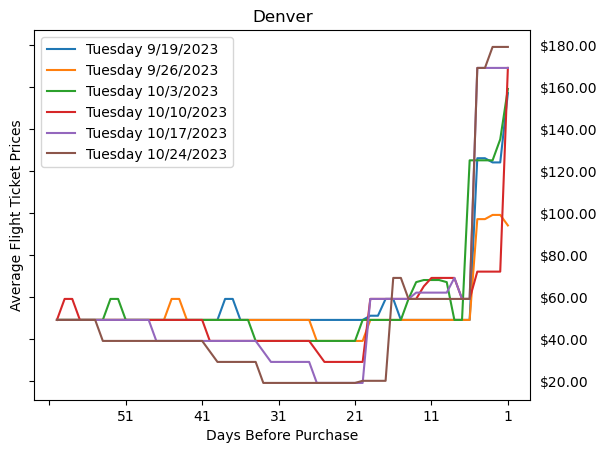

In [10]:
import csv
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
destinations=(['Atlanta','Austin','Boston','Charlotte','Chicago','Cincinati','Dallas','Denver',
               'Fort Lauderdale','Detroit','Houston','Las Vegas','Los Angeles','Miami','Minneapolis',
               'Nashville','New York','Orlando',
               'Philadelphia','Phoenix', 'Pittsburgh','San Francisco','Seattle','Tampa','Washington'])

#Concatanate all files and read into a panda dataframe
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "./Data/flight_prices*.csv"))))

Weekday_dict =({"Wed":["9/13/2023","9/20/2023","9/27/2023","10/4/2023","10/11/2023","10/18/2023"], 
                "Thu":["9/14/2023","9/21/2023","9/28/2023","10/5/2023","10/12/2023","10/19/2023"],
               "Fri":["9/15/2023","9/22/2023","9/29/2023","10/6/2023","10/13/2023","10/20/2023"], 
                "Sat":["9/16/2023","9/23/2023","9/30/2023","10/7/2023","10/14/2023","10/21/2023"],
               "Sun":["9/17/2023","9/24/2023","10/1/2023","10/8/2023","10/15/2023","10/22/2023"], 
                "Mon":["9/18/2023","9/25/2023","10/2/2023","10/9/2023","10/16/2023","10/23/2023"],
               "Tue":["9/19/2023","9/26/2023","10/3/2023","10/10/2023","10/17/2023","10/24/2023"]})

import random
import numpy as np

days =["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

#If you want to randomly graph for different destinations and days
#day_index = random.randint(0, 6)
#destination_index=random.randint(0, 24)
#destination = destinations[destination_index]
#weekdays = [days[day_index]]



colors = ['blue','black','green','red','orange','purple']
weekdays = ["Tue"]
destination="Denver"

ax = plt.gca()
plt.title(destination)

for weekday in weekdays:
    for day in Weekday_dict[weekday]:
        new_df = df[(df.Destination == destination) & (df.Departure_Date == day)]
        label = new_df['Day_of_the_Week'][new_df.index[0]] + ' ' +day[0:10]
        mean+=new_df['Price']
        new_df.plot(x='Days_Ago',y='Price',ax=ax, label = label)
    
    plt.ylabel('Average Flight Ticket Prices')
    plt.xlabel('Days Before Purchase')
    plt.gca().invert_xaxis()
    
    ax.yaxis.set_major_formatter('${x:1.2f}')

    ax.yaxis.set_tick_params(which='major',
                         labelleft=False, labelright=True)

## Outlier Detection

For each pooled data, we compare the average price of all flights. If the average price of a flight is not within two standard deviation of the mean of all pooled flight prices, that is marked as an outlier.

In [11]:
import numpy as np
weekdays = ["Mon","Tue","Wed", "Thu","Fri","Sat","Sun"]

#Check if the average price of a flight is within 2 standard devations of the mean of the pooled data, if not,
#mark that flight as an outlier in the outliers dictionary.
outliers_dict={}
outlier_count=0
for destination in destinations:
    for weekday in weekdays:
        mean_list=[]
        for day in Weekday_dict[weekday]:
            new_df = df[(df.Destination == destination) & (df.Departure_Date == day)]
            outliers_dict[destination,day]=False
            my_mean = new_df['Price'].mean(axis=0)
            mean_list.append(my_mean)
        median = np.median(mean_list)
        std_dev = np.std(mean_list)
        # Define a threshold for identifying outliers (e.g., 2 standard deviations away from the mean)
        threshold = 2*std_dev
        outliers = [mean_list.index(x) for x in mean_list if abs(x - median) > threshold]
        for n in outliers:
            outliers_dict[destination,Weekday_dict[weekday][n]]=True
            outlier_count+=1            

## Predict Best Time Window and Calculate Accuracy by Cross Validation

In this part of the project, we estimate the best time window to purchase tickets based on the minimum average pooled price. We first start a window size of 7 days, if the accuracy is lower than 80%, we increase our window size to 14 days and then 21 days if needed.

We calculate the accuracy with cross validation. We pooled data for 6 weeks. So we estimate the best time window using 5 weeks of data and then compare this with the one that is not included and we repeat this 6 times. 

Our overall accuracy is on average, average price of the predicted time-window is 10% off from the average minimum price of the best time-window.  
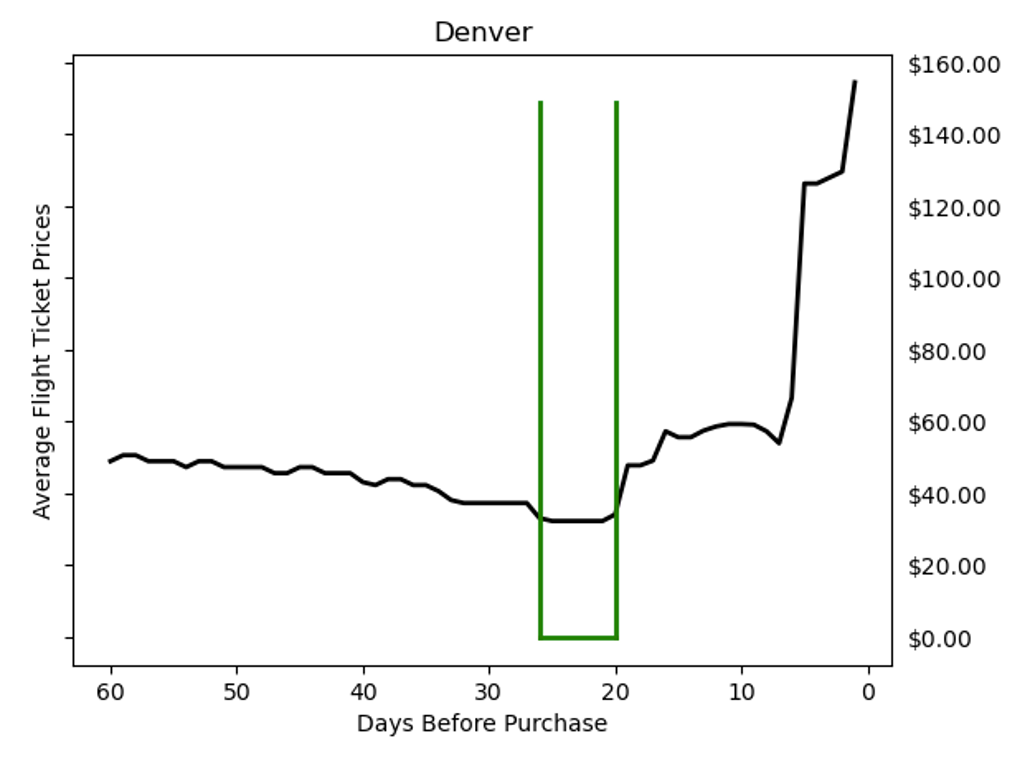

In [22]:
from statistics import mean

def find_min_price_of_a_graph(new_df):
    new_df2= new_df.copy()
    min_price = new_df['Price'].min(axis=0)
    while new_df2['Price'].value_counts()[min_price]<5:
        new_df2.drop(new_df[new_df['Price'] == min_price].index, inplace=True)
        min_price = new_df2['Price'].min(axis=0)
    return min_price

def find_min_indexes_of_a_graph(new_df):
    min_price = find_min_price_of_a_graph(new_df)
    min_indexes = [row['Days_Ago'] for _,row in new_df.iterrows() if row['Price']== min_price]
    return min_indexes

def count_number_of_mins_in_window(window_size):
    for i in range(1,60-window_size+1):
        print(i,i+window_size-1)
        count_mins = len([i for i in range(i,i+window_size) if i in min_indexes])
        print(count_mins)

#This function calculates accuracy of each estimated time window based on the accuracy 
#calculated by cross validation.
def calculate_success(window_size,min_indexes_list,prices_list):
    best_win_index_list=[]
    min_count_list=[]
    percentage2_list=[]
    for j in range(len(min_indexes_list)):
        metric_list=[]
        metric2_list=[]
        for i in range(1,60-window_size+1):#iterate for different windows
            metric=0 # metric for all 5 grphs combination
            metric2=0
            for k in range(len(min_indexes_list)): 
                if (k!=j):
                    count_mins = len([i for i in range(i,i+window_size) if i in min_indexes_list[k]])
                    metric+=(1-(1/2)**count_mins)/(1/2)
                    ##################
                    price_total=0
                    for q in range(i,i+window_size):
                        price_total += prices_list[k][q]
                    metric2+=price_total
                    ####################
            metric = metric/window_size
            metric_list.append(metric) #Metric list for each window, all graphs combined
            #################################   
            metric2 = metric2/(window_size*(len(min_indexes_list)-1))
            metric2_list.append(metric2) #Metric list for each window, all graphs combined
            ###############################    
        best_win_index = metric_list.index(max(metric_list))+1
        best_win_index2 = metric2_list.index(min(metric2_list))+1
        my_min_av_price = sum(prices_list[j][best_win_index2:best_win_index2+window_size])/window_size
        overall_min_av_price=1000
        for z in range(1,60-window_size+1):
            min_av_price = sum(prices_list[j][z:z+window_size])/window_size
            if min_av_price < overall_min_av_price:
                overall_min_av_price = min_av_price
        percentage2=int(100*(2*overall_min_av_price-my_min_av_price)/overall_min_av_price)
        percentage2_list.append(percentage2)
        min_count = len([m for m in range(best_win_index,best_win_index+window_size) if m in min_indexes_list[j]])
        best_win_index_list.append(best_win_index)
        min_count_list.append(min_count)
    success=len([i for i in min_count_list if i!=0])
    percentage=int((success/len(min_count_list))*100)
    percentage2=mean(percentage2_list)
    return len(min_count_list),success,percentage2, window_size

In [23]:
#Now we determine the window size (7,14, or 21) based on accuracy and calculate overall accuracy with cross validation
min_indexes_list=[]
my_dict = ({'Destination':[],'Weekday':[],'Number of Days':[], 'Number of Success':[], 
            'Percentage':[],'Window Size':[]})
metric_df=pd.DataFrame(my_dict)
for destination in destinations:
    for weekday in weekdays:
        min_indexes_list=[]
        prices_list=[]
        for day in Weekday_dict[weekday]: #Find minimum indexes for all days
                if outliers_dict[destination,day]==False:
                    new_df = df[(df.Destination == destination) & (df.Departure_Date == day)]
                    prices=list(new_df['Price'])
                    prices_list.append(prices)
                    min_indexes_list.append(find_min_indexes_of_a_graph(new_df))
        window_size = 7 #Start with a window size of 7
        min_count_list_len,success,percentage, window_size=calculate_success(window_size,min_indexes_list,prices_list)
        ###########################
        if percentage<80:
            window_size = 14
            min_count_list_len,success,percentage, window_size=calculate_success(window_size,min_indexes_list,prices_list)
        #####################
            if percentage<80:
                window_size = 21
                min_count_list_len,success,percentage, window_size=calculate_success(window_size,min_indexes_list,prices_list)
        #####################
        row=[destination,weekday,min_count_list_len,success,percentage, window_size]
        metric_df.loc[len(metric_df.index)] = row

print('Overall Accuracy: ')
print(mean(metric_df['Percentage']))

Overall Accuracy: 
88.722


## Build a Look Up Table for the Website

In this part, we build a look up table that includes the time window indexes, average prices for the color chart, minimum estimated price and the performance of each estimated time window. 

In [21]:
import numpy as np
weekdays = ["Mon","Tue","Wed", "Thu","Fri","Sat","Sun"]
lookup_table_filename = "./Data/lookup_table5.csv"
fields = (['Destination','Weekday', 'Best Win Index','Window Size','Min Price','Percentage',
          'Int1','Int2', 'Int3','Int4','Int5','Int6','Int7', 'Int8','Int9','Int10','Int11',
           'Int12', 'Int13','Int14','Int15'])
with open(lookup_table_filename, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)     
    csvwriter.writerow(fields) 
window_size = 7
min_indexes_list=[]
min_prices_list=[]

for destination in destinations:
    for weekday in weekdays:
        min_indexes_list=[]
        min_prices_list=[]
        prices_list=[]
        for day in Weekday_dict[weekday]:
            if outliers_dict[destination,day]==False:
                new_df = df[(df.Destination == destination) & (df.Departure_Date == day)]
                #print(new_df['Price'].mean(axis=0))
                prices=list(new_df['Price'])
                prices_list.append(prices)
                min_indexes_list.append(find_min_indexes_of_a_graph(new_df))
                min_prices_list.append(find_min_price_of_a_graph(new_df))
        #print(len(min_indexes_list))
        metric_list=[]
        metric2_list=[]
        metric3_list=[]
        metric_df2 = metric_df[(metric_df.Destination == destination) & (metric_df.Weekday == weekday)]
        window_size=metric_df2['Window Size'].item()
        percentage=metric_df2['Percentage'].item()
        for i in range(1,60-window_size+1):
            #print(i,i+window_size-1)
            metric=0
            metric2=0
            for j in range(len(min_indexes_list)):
                count_mins = len([i for i in range(i,i+window_size) if i in min_indexes_list[j]])
                #print(count_mins)
                metric+=(1-(1/2)**count_mins)/(1/2)
                #####################
                price_total=0
                for q in range(i,i+window_size):
                    price_total += prices_list[j][q]
                metric2+=price_total
                ####################
            metric = metric/window_size
            metric_list.append(metric)
            #################################   
            metric2 = metric2/(window_size*(len(min_indexes_list)-1))
            metric2_list.append(metric2) #Metric list for each window, all graphs combined
            ###############################    
        for m in range(0,60-4+1,4):
            #print(i,i+window_size-1)
            metric3=0
            for j in range(len(min_indexes_list)):
                #####################
                price_total=0
                for n in range(m,m+4):
                    price_total += prices_list[j][n]
                metric3+=price_total
                ####################
            #################################   
            metric3 = metric3/(4*(len(min_indexes_list)))
            metric3_list.append(metric3) #Metric list for each window, all graphs combined
            ###############################    
        #print(metric_list)
        #print(max(metric_list))
        global_min = median = np.median(min_prices_list)
        best_win_index = metric_list.index(max(metric_list))+1
        best_win_index2 = metric2_list.index(min(metric2_list))+2
        row = [destination, weekday, best_win_index2, window_size,global_min,percentage]+metric3_list
        with open(lookup_table_filename, 'a') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(row) 
df3 = pd.read_csv("./Data/lookup_table5.csv")
df3.head(5)

,Destination,Weekday,Best Win Index,Window Size,Min Price,Percentage,Int1,Int2,Int3,Int4,...,Int6,Int7,Int8,Int9,Int10,Int11,Int12,Int13,Int14,Int15
0,Atlanta,Mon,22,21,19.0,80.666667,95.625000,48.875000,41.458333,40.000000,...,33.875000,34.958333,38.333333,34.666667,34.291667,34.166667,34.708333,37.833333,37.083333,39.625000
1,Atlanta,Tue,22,21,19.0,79.000000,92.583333,39.666667,30.666667,30.333333,...,25.750000,25.458333,23.750000,23.750000,24.333333,25.333333,26.416667,27.333333,27.125000,28.791667
2,Atlanta,Wed,20,21,19.0,82.500000,92.875000,35.750000,28.083333,25.833333,...,23.666667,24.166667,23.416667,23.750000,25.083333,25.125000,27.583333,26.916667,26.916667,27.750000
3,Atlanta,Thu,30,21,19.0,79.666667,89.208333,47.250000,40.750000,39.291667,...,35.291667,39.125000,36.541667,35.458333,34.333333,34.541667,36.916667,35.833333,37.916667,37.791667
4,Atlanta,Fri,20,7,49.0,95.500000,102.583333,63.875000,71.083333,60.750000,...,50.666667,54.000000,54.833333,57.333333,56.916667,57.333333,55.666667,55.250000,55.666667,56.291667


## Building the Website

We calculate the time window based on entered destination and flight date.

In [ ]:
import pandas as pd
from datetime import date, timedelta
import csv
import glob
import os
import calendar
import altair as alt
d = ({'Date':[1,2,3,4,5,6,7,8,9,10], 'Ave Price':[60, 80, 30, 40,50,100,20,45,70,90], 'month':['Oct','Oct','Oct','Oct','Oct','Oct','Oct','Oct','Oct','Oct']})
#my_df = pd.DataFrame(d)
def plot_bar(my_df):
    c=(alt.Chart(my_df, title="Average Ticket Prices Based on Historical Price Trends").mark_rect().encode(
        alt.X("Date",type='nominal',sort=None).title("Purchase Date"),
        alt.Y("Interval",type='ordinal',axis=alt.Axis(labels=False)).title(None),
        alt.Color("Ave Price",scale=alt.Scale(scheme='redyellowgreen'),sort="descending").title(None),
       tooltip =['Date',alt.Tooltip('Ave Price')])
       .configure_axis(
        labelFontSize=20,
        titleFontSize=20)
      )
    return c 

def plot_line(my_df):
    c2=(alt.Chart(my_df).mark_line().encode(
    alt.X("Date"), alt.Y("Ave Price")
    )
      )
    return c2   

#df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "./Data/flight_prices_Sep*.csv"))))
df = pd.read_csv("./Data/lookup_table4.csv")
win_size=7
def predict_best_time(destination,flight_date):
    int_prices=[]
    weekday = calendar.day_name[flight_date.weekday()]
    win_start_index = df.loc[((df.Destination == destination) & (df.Weekday == weekday[0:3])), 'Best Win Index'].item()
    min_price = df.loc[((df.Destination == destination) & (df.Weekday == weekday[0:3])), 'Min Price'].item()
    win_size = df.loc[((df.Destination == destination) & (df.Weekday == weekday[0:3])), 'Window Size'].item()
    df2 = df.loc[((df.Destination == destination) & (df.Weekday == weekday[0:3]))]
    for i in range(6,21):
        int_prices.append(df2[df2.columns[i]].item())
    from datetime import date, timedelta
    win_start_date = flight_date - timedelta(win_start_index)
    win_end_date = win_start_date - timedelta(win_size)
    return win_start_date,win_end_date, min_price,int_prices 


In [ ]:
import streamlit as st
import predictor
import pandas as pd
import altair as alt
import numpy as np
import calendar
from datetime import date, timedelta

st.header("Purchase Flight Tickets at the Right Time and Save Money")
st.text("Nonstop Flights from Raleigh (RDU) Airport")
#destination = st.text_input("Destination")
#st.sidebar.title("Enter Date and Destination of the Flight")
#destination = st.sidebar.text_input("Destination")
destination = st.selectbox(
    'Destination',
    ('Atlanta','Austin','Boston','Charlotte','Chicago','Cincinati','Dallas','Denver',
               'Fort Lauderdale','Detroit','Houston','Las Vegas','Los Angeles','Miami','Minneapolis',
               'Nashville','New York','Orlando',
               'Philadelphia','Phoenix', 'Pittsburgh','San Francisco','Seattle','Tampa','Washington'))
flight_date = st.date_input("Flight Date")
win_start_date,win_end_date, min_price,int_prices = predictor.predict_best_time(destination,flight_date)
int_prices = [int(i) for i in int_prices]
int_prices[0]=int((int_prices[0]+int_prices[1])/2)
int_prices.reverse()
Date = []
for i in range(0,60,4):
    date = flight_date - timedelta(i)
    Date.append(date.strftime("%b %d"))
Date.reverse()
    #############
d = ({'Date':Date, 'Ave Price': int_prices, 'Interval':['4 days','4 days','4 days','4 days',
                                                        '4 days','4 days','4 days','4 days','4 days','4 days','4 days','4 days','4 days','4 days','4 days']})
my_df = pd.DataFrame(d)
c = predictor.plot_bar(my_df)
c2 = predictor.plot_line(my_df)
################
if st.button("SUBMIT"):
    st.subheader("The cheapest time to book is likely :green[between "+ win_end_date.strftime("%b %d") +" and  " + win_start_date.strftime("%b %d")+".] "+"Minimum estimated price is around :green[$"+ str(min_price)+".]")
    st.altair_chart(c, use_container_width=True)
    #st.altair_chart(c2, use_container_width=True)

## Conclusion

- Scope: Covered nonstop flights from Raleigh to 25 different destinations
- Data: Scraped 7 weeks of data from google flights
- Accuracy : On average, average price of the predicted time-window is 10% off from the average min. price of the best time-window. (calculated with cross validation)
- Next Step: Incorporate seasonal variations